### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.
 
### CHAPTER 12
**CH12 Time series simulations**

version 1.0 2021-05-31
 
 

In [1]:
import os
import sys
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
output = dirname + "da_case_studies/ch02-football-manager-success/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)


### PART 1

Random walk simulation

Generate k random walks across time {0, 1, ... , T}


In [4]:
T = 100  # number of obs
k = 5  # nr of random walks generated

Define function for generating a random walk series

In [5]:
def random_walk(initial_value: float, T: int, seed=None) -> np.array:
    """
    Generate random walk series of T length.

       Parameters
    ----------
    initial_value : float

    T : int
        Length of the random walk series
    seed : bool or int, defalt=None
        Set seed to get the same series.
        For reproducibility.
    """
    rng = np.random.default_rng(seed)
    return initial_value + np.insert(np.cumsum(rng.normal(0, 1, T - 1)), 0, 0)

Each random walk starts from 0

In [6]:
initial_value = 0

In [7]:
rws = (
    pd.DataFrame(
        [
            random_walk(initial_value, T, seed=i) for i in range(k)
        ],  # set seed=None here if you want a different result
        index=[f"V{i+1}" for i in range(k)],
        columns=[i for i in range(1, T + 1)],
    )
    .T.reset_index()
    .rename(columns={"index": "time"})
)
rws

,time,V1,V2,V3,V4,V5
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0.125730,0.345584,0.189053,2.040919,-0.651791
2,3,-0.006375,1.167202,-0.333695,-0.514746,-0.826508
3,4,0.634048,1.497639,-0.746759,-0.096647,0.837216
4,5,0.738948,0.194482,-3.188226,-0.664417,1.496363
...,...,...,...,...,...,...
95,96,10.245475,-3.912167,1.747275,-6.628912,-8.266740
96,97,11.276929,-6.163022,1.794679,-8.358926,-8.113720
97,98,11.437938,-6.301677,1.359994,-8.363340,-7.948482
98,99,10.852409,-6.268677,0.657106,-7.149776,-6.811047


Melt dataframe for plotnine

In [8]:
rws = rws.melt(id_vars="time")

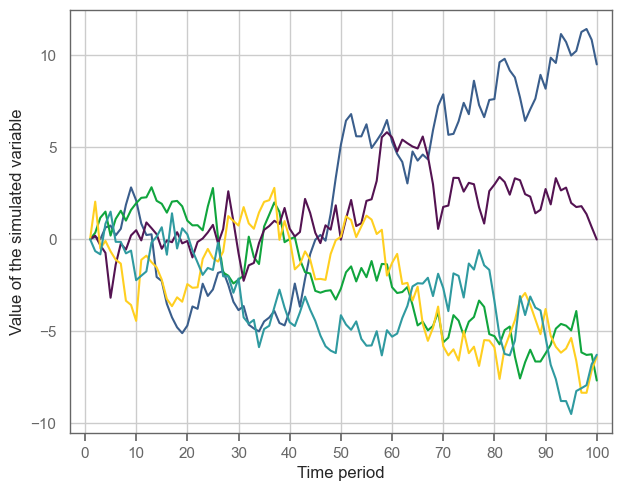

In [9]:
sns.lineplot(
    data=rws,
    x="time",
    y="value",
    hue="variable",
    palette=[da.color[0], da.color[1], da.color[2], da.color[3], da.color[4]],
    linewidth=1.5,  
    legend=False,   
)

plt.xlabel("Time period")
plt.ylabel("Value of the simulated variable")
plt.xlim(-3, 103)
plt.xticks(ticks=da.seq(0, 100, 10)) 
plt.show()

### PART 2

Serially uncorrelated vs serially correlated series

Simulation exercies:
  1. generate white noises (uncorrelated series)
  2. generate serially correlated series with rho=0.8 from white noise

In [10]:
rng = np.random.default_rng(1000)

white_noise = rng.normal(0, 1, T)

rho = 0.8
serially_correlated = np.zeros(T)
serially_correlated[0] = white_noise[0]

for i in range(1, len(serially_correlated)):
    serially_correlated[i] = rho * serially_correlated[i - 1] + white_noise[i]

In [11]:
series_simulation_data = pd.DataFrame(
    [white_noise, serially_correlated],
    index=["white_noise", "corr_08"],
).T
series_simulation_data["time"] = series_simulation_data.index + 1
series_simulation_data

,white_noise,corr_08,time
0,-0.321330,-0.321330,1
1,-0.485661,-0.742726,2
2,1.680058,1.085878,3
3,1.970527,2.839229,4
4,0.155184,2.426567,5
...,...,...,...
95,-0.168728,-2.728617,96
96,-0.495815,-2.678709,97
97,1.262406,-0.880561,98
98,-1.567089,-2.271538,99


Whitenoise

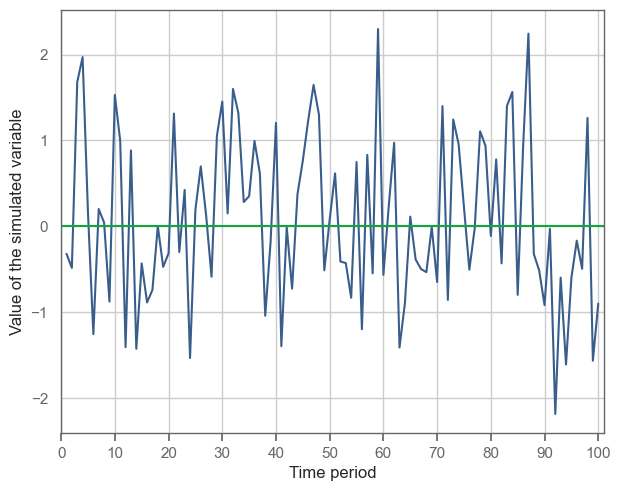

In [12]:
sns.lineplot(
    data=series_simulation_data,
    x="time",
    y="white_noise",
    color=da.color[0],
    linewidth=1.5
)
plt.axhline(y=0, color=da.color[1], linewidth=1.5)
plt.xlabel("Time period")
plt.ylabel("Value of the simulated variable")
plt.xlim(series_simulation_data["time"].min()-1, series_simulation_data["time"].max()+1)
plt.xticks(ticks=da.seq(0, 100, 10)) 
plt.show()

Serially correlated series, rho=0.8

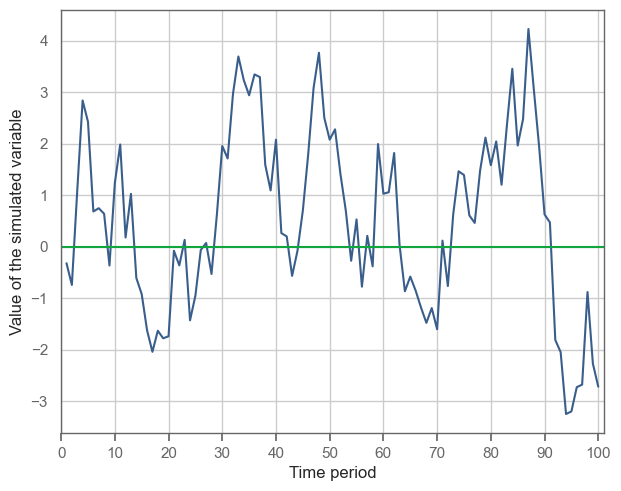

In [13]:
sns.lineplot(
    data=series_simulation_data,
    x="time",
    y="corr_08",
    color=da.color[0],
    linewidth=1.5
)
plt.axhline(y=0, color=da.color[1], linewidth=1.5)
plt.xlabel("Time period")
plt.ylabel("Value of the simulated variable")
plt.xlim(series_simulation_data["time"].min()-1, series_simulation_data["time"].max()+1)
plt.xticks(ticks=da.seq(0, 100, 10)) 
plt.show()

Two series on one plot -  not in book

In [14]:
melted_data = series_simulation_data.melt(id_vars="time")

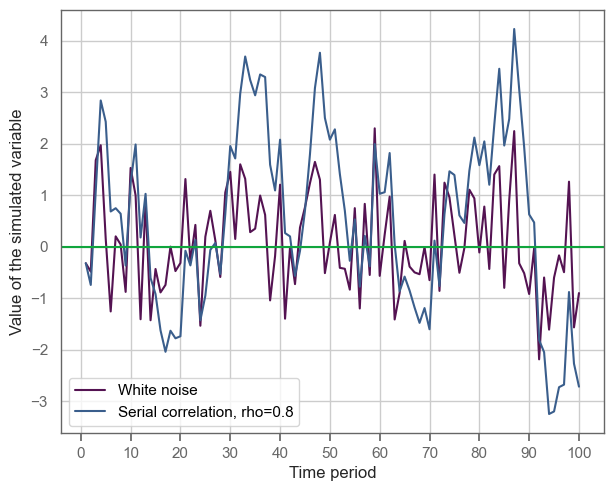

In [15]:

sns.lineplot(
    data=melted_data,
    x="time",
    y="value",
    hue="variable",
    palette=[da.color[2], da.color[0]], 
    linewidth=1.5, 
)

plt.axhline(y=0, color=da.color[1], linewidth=1.5)
plt.xlabel("Time period")
plt.ylabel("Value of the simulated variable")

legend_labels = ["White noise",f"Serial correlation, rho={rho}"]
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=legend_labels, title="")  
plt.xticks(ticks=da.seq(0, 100, 10))  
plt.show()